Q- 3. A company wants to predict the sales of its product based on the money spent on different platforms for marketing. They want you to figure out how they can spend money on marketing in the future in such a way that they can increase their
profit as much as possible built-in docker and use some library to display that in frontend

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv(r"D:\assignments\Machine_learning\data\advertising.csv")

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [15]:
## Independent and dependent feature
X = df.drop(labels=['Sales'],axis=1)
Y = df[['Sales']]

In [16]:
numerical_cols=X.columns

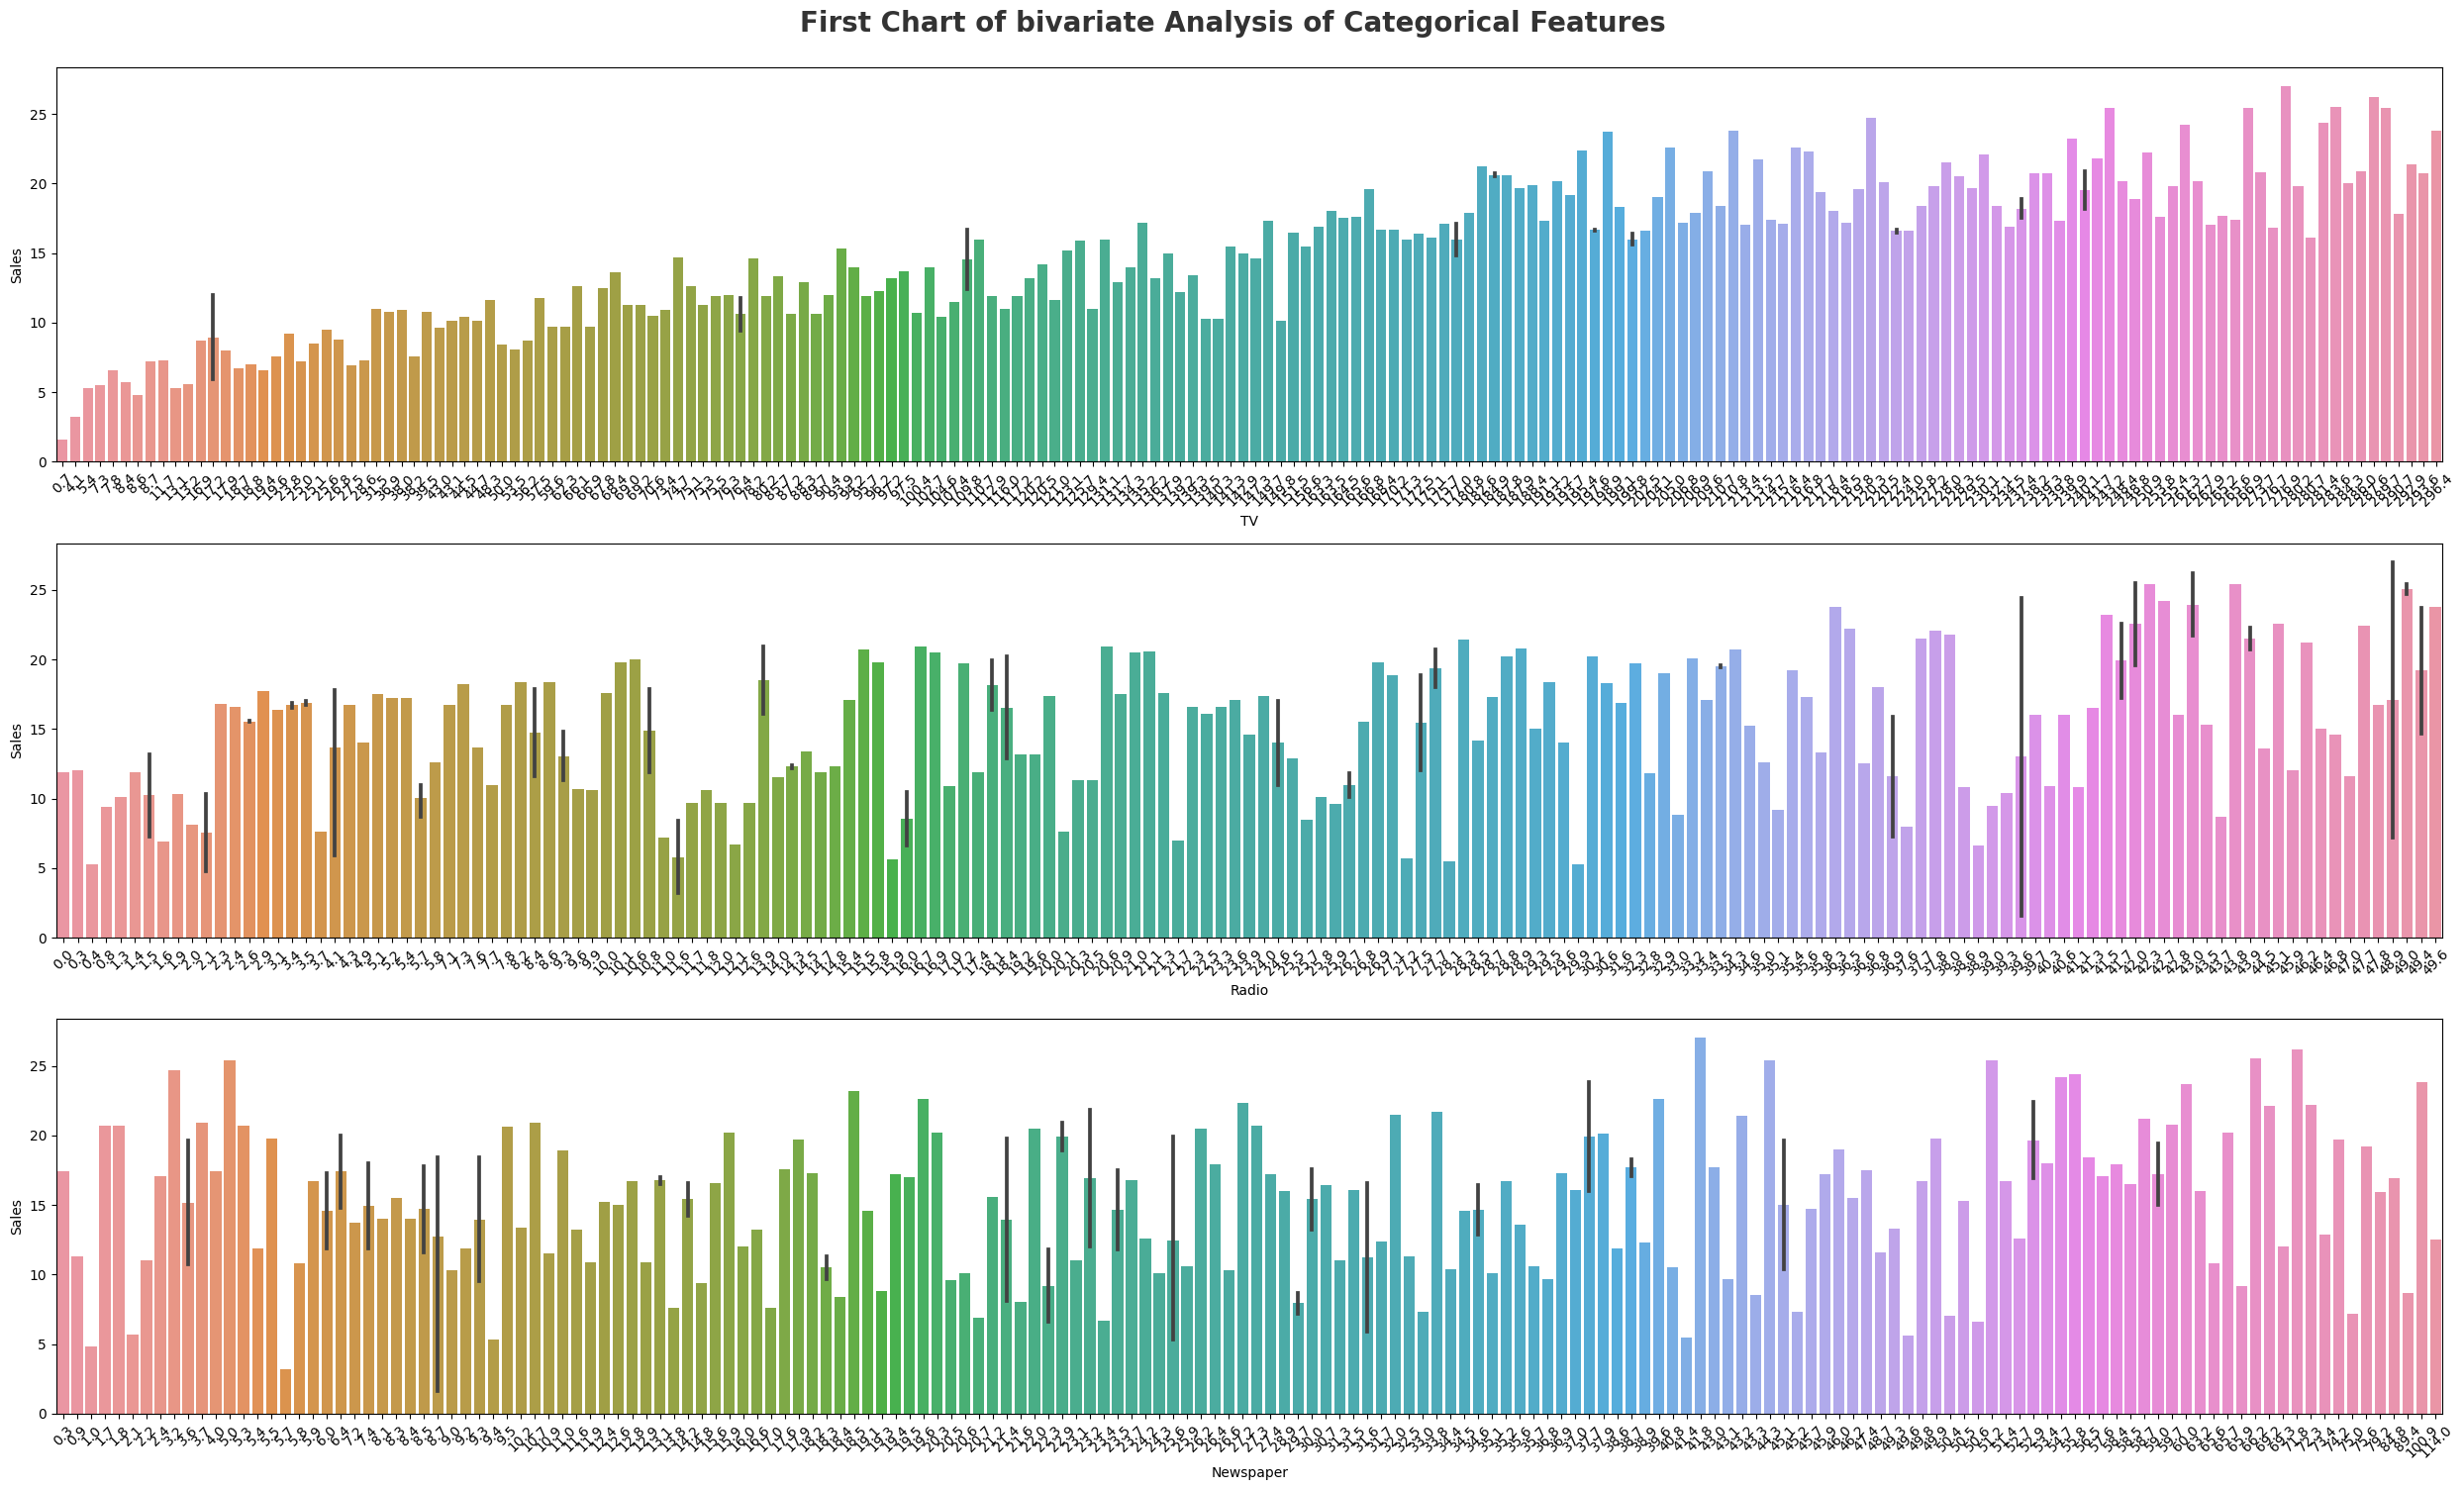

In [53]:
# plot for all columns
plt.figure(figsize=(25, 15))
plt.suptitle('First Chart of bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(numerical_cols)):
    plt.subplot(3, 1, i+1)
    sns.barplot(data = df, x = df[numerical_cols[i]], y='Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

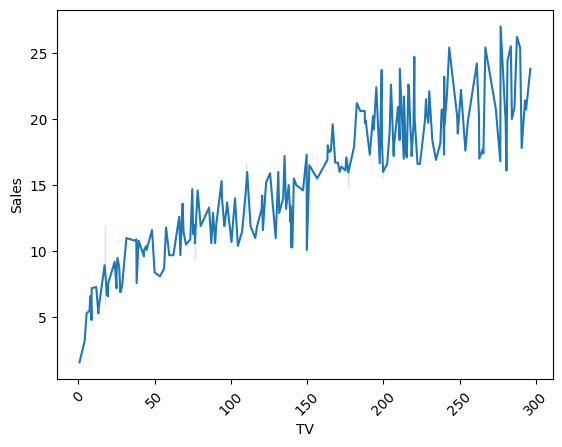

In [58]:
sns.lineplot(data = df, x = 'TV', y='Sales');
plt.xticks(rotation=45)


In [21]:
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines A
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [22]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols)
])


In [23]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
X_train.head()

,num_pipeline__TV,num_pipeline__Radio,num_pipeline__Newspaper
0,-0.404248,-1.028237,-0.337675
1,0.320608,-0.919828,-1.161439
2,-1.270511,0.259124,0.254251
3,-1.042359,-0.696233,-0.574446
4,0.879103,-1.387343,-0.707629


<AxesSubplot: >

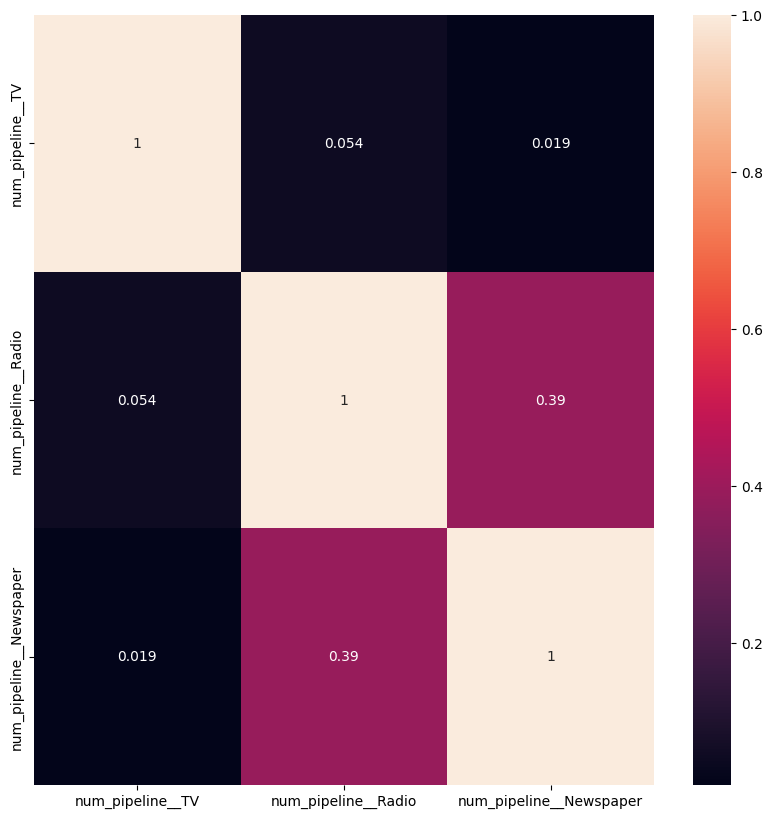

In [25]:
##correlation
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True)

In [37]:
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso,Ridge
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [44]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [47]:
## Train multiple models
models = {
          "LinearRegression":LinearRegression(),
          "ElasticNet":ElasticNet(),
          'Ridge':Ridge(),
          "Lasso": Lasso()
}    
trained_model_list=[]
model_list=[]
r2_score_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, mse, rmse, r2_square=evaluate_model(y_test,y_pred)
    

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_score_list.append(r2_square)

    print('Model Training Performance')
    print("MSE: ",mse)
    print("MAE: ",mae)
    print("RMSE: ",rmse)
    print("r2_score: ",r2_square)
     
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
MSE:  2.9077569102710923
MAE:  1.2748262109549349
RMSE:  1.7052146229349232
r2_score:  0.9059011844150826


ElasticNet
Model Training Performance
MSE:  8.075873133138368
MAE:  2.2846187375805997
RMSE:  2.8418080746486676
r2_score:  0.7386541859953734


Ridge
Model Training Performance
MSE:  2.915318013511375
MAE:  1.273447172019252
RMSE:  1.7074302367919385
r2_score:  0.9056564972278859


Lasso
Model Training Performance
MSE:  5.493708384763458
MAE:  1.7891448881743948
RMSE:  2.343866119206355
r2_score:  0.8222164135010256




<AxesSubplot: >

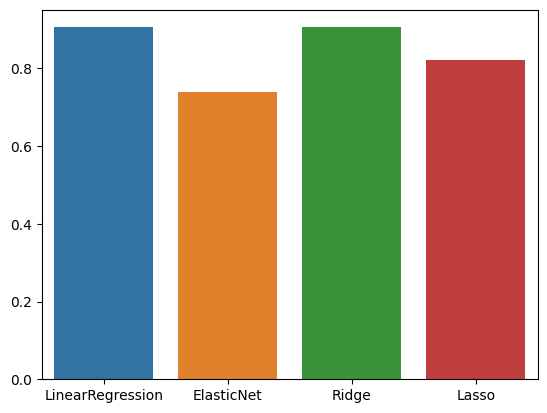

In [48]:
sns.barplot(x=model_list,y=r2_score_list)